In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Wed Apr 19 21:17:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    32W /  70W |   1693MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [38]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [39]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [40]:
from ultralytics import YOLO
from IPython.display import display, Image

In [41]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Nu7pON6aDfR567whd9dY")
project = rf.workspace("home-xqopq").project("ursos")
dataset = project.version(1).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ursos-1 in yolov8:: 100%|██████████| 166/166 [00:00<00:00, 2207.11it/s]


In [42]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=52 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 346MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/ursos-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=52, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

In [43]:
!ls {HOME}/runs/detect/train/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1681941772.a2a222fc5845.29791.0  train_batch2.jpg
F1_curve.png					     train_batch60.jpg
P_curve.png					     train_batch61.jpg
PR_curve.png					     train_batch62.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


/content


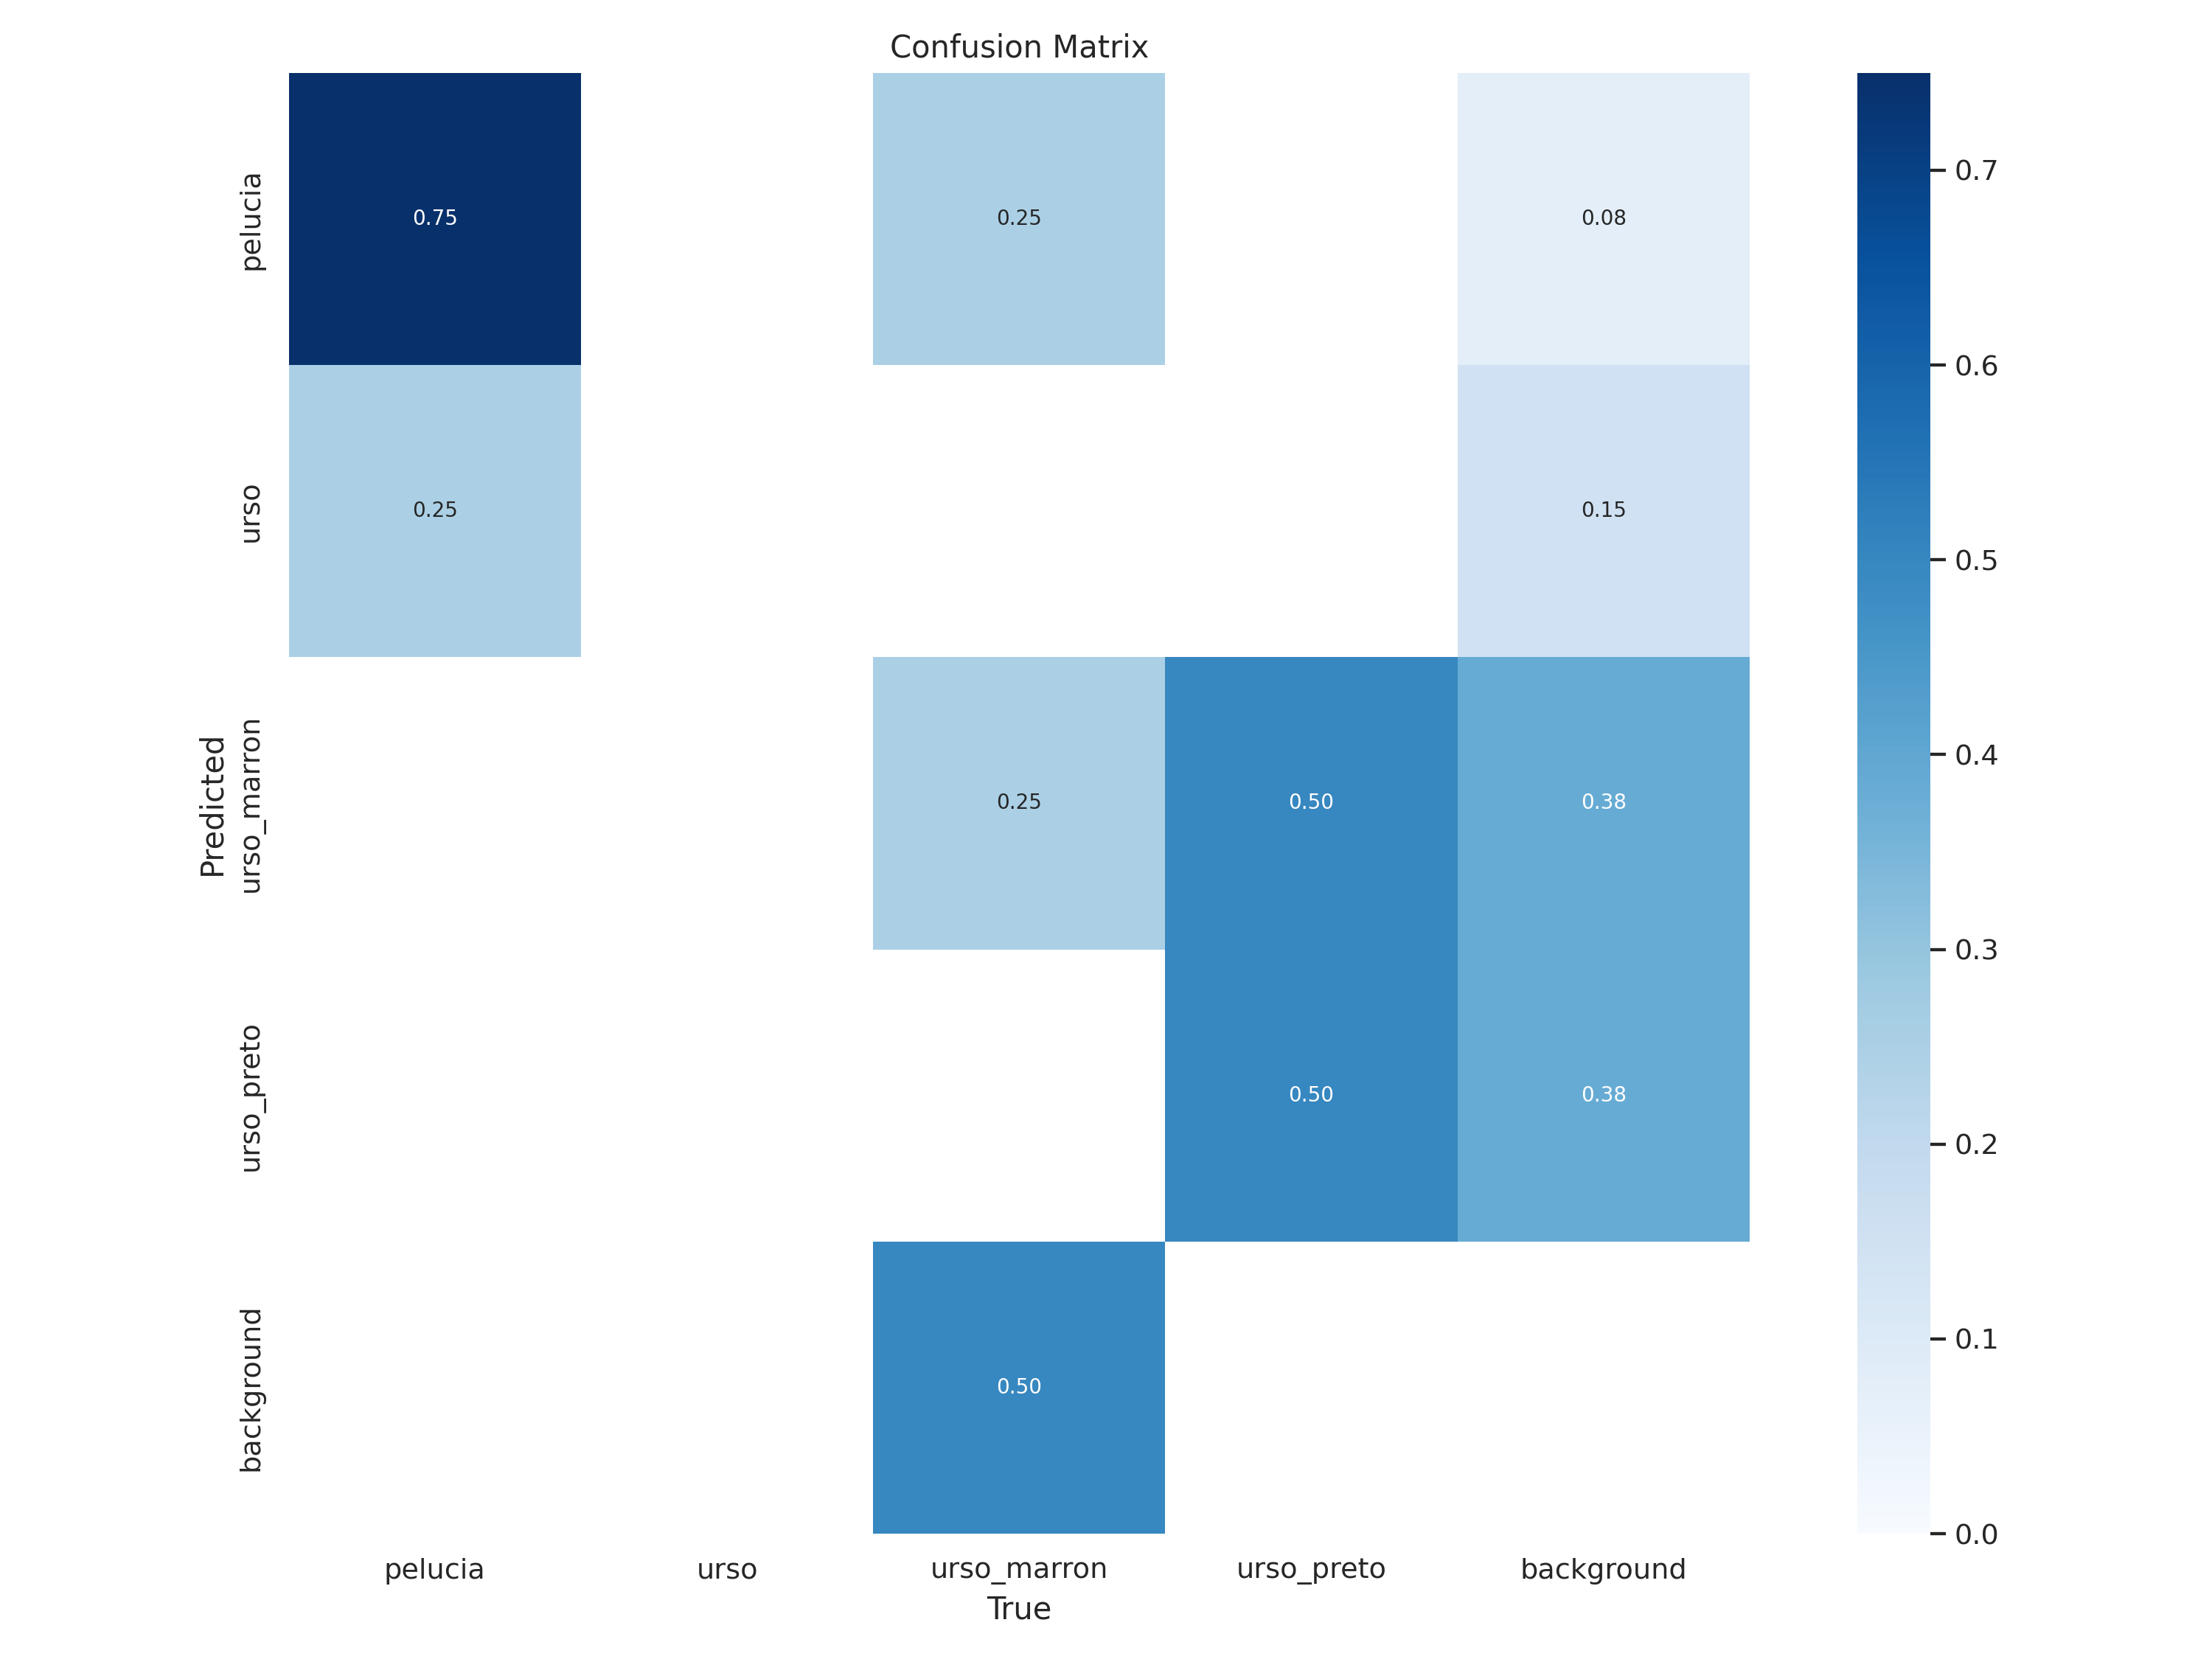

In [44]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


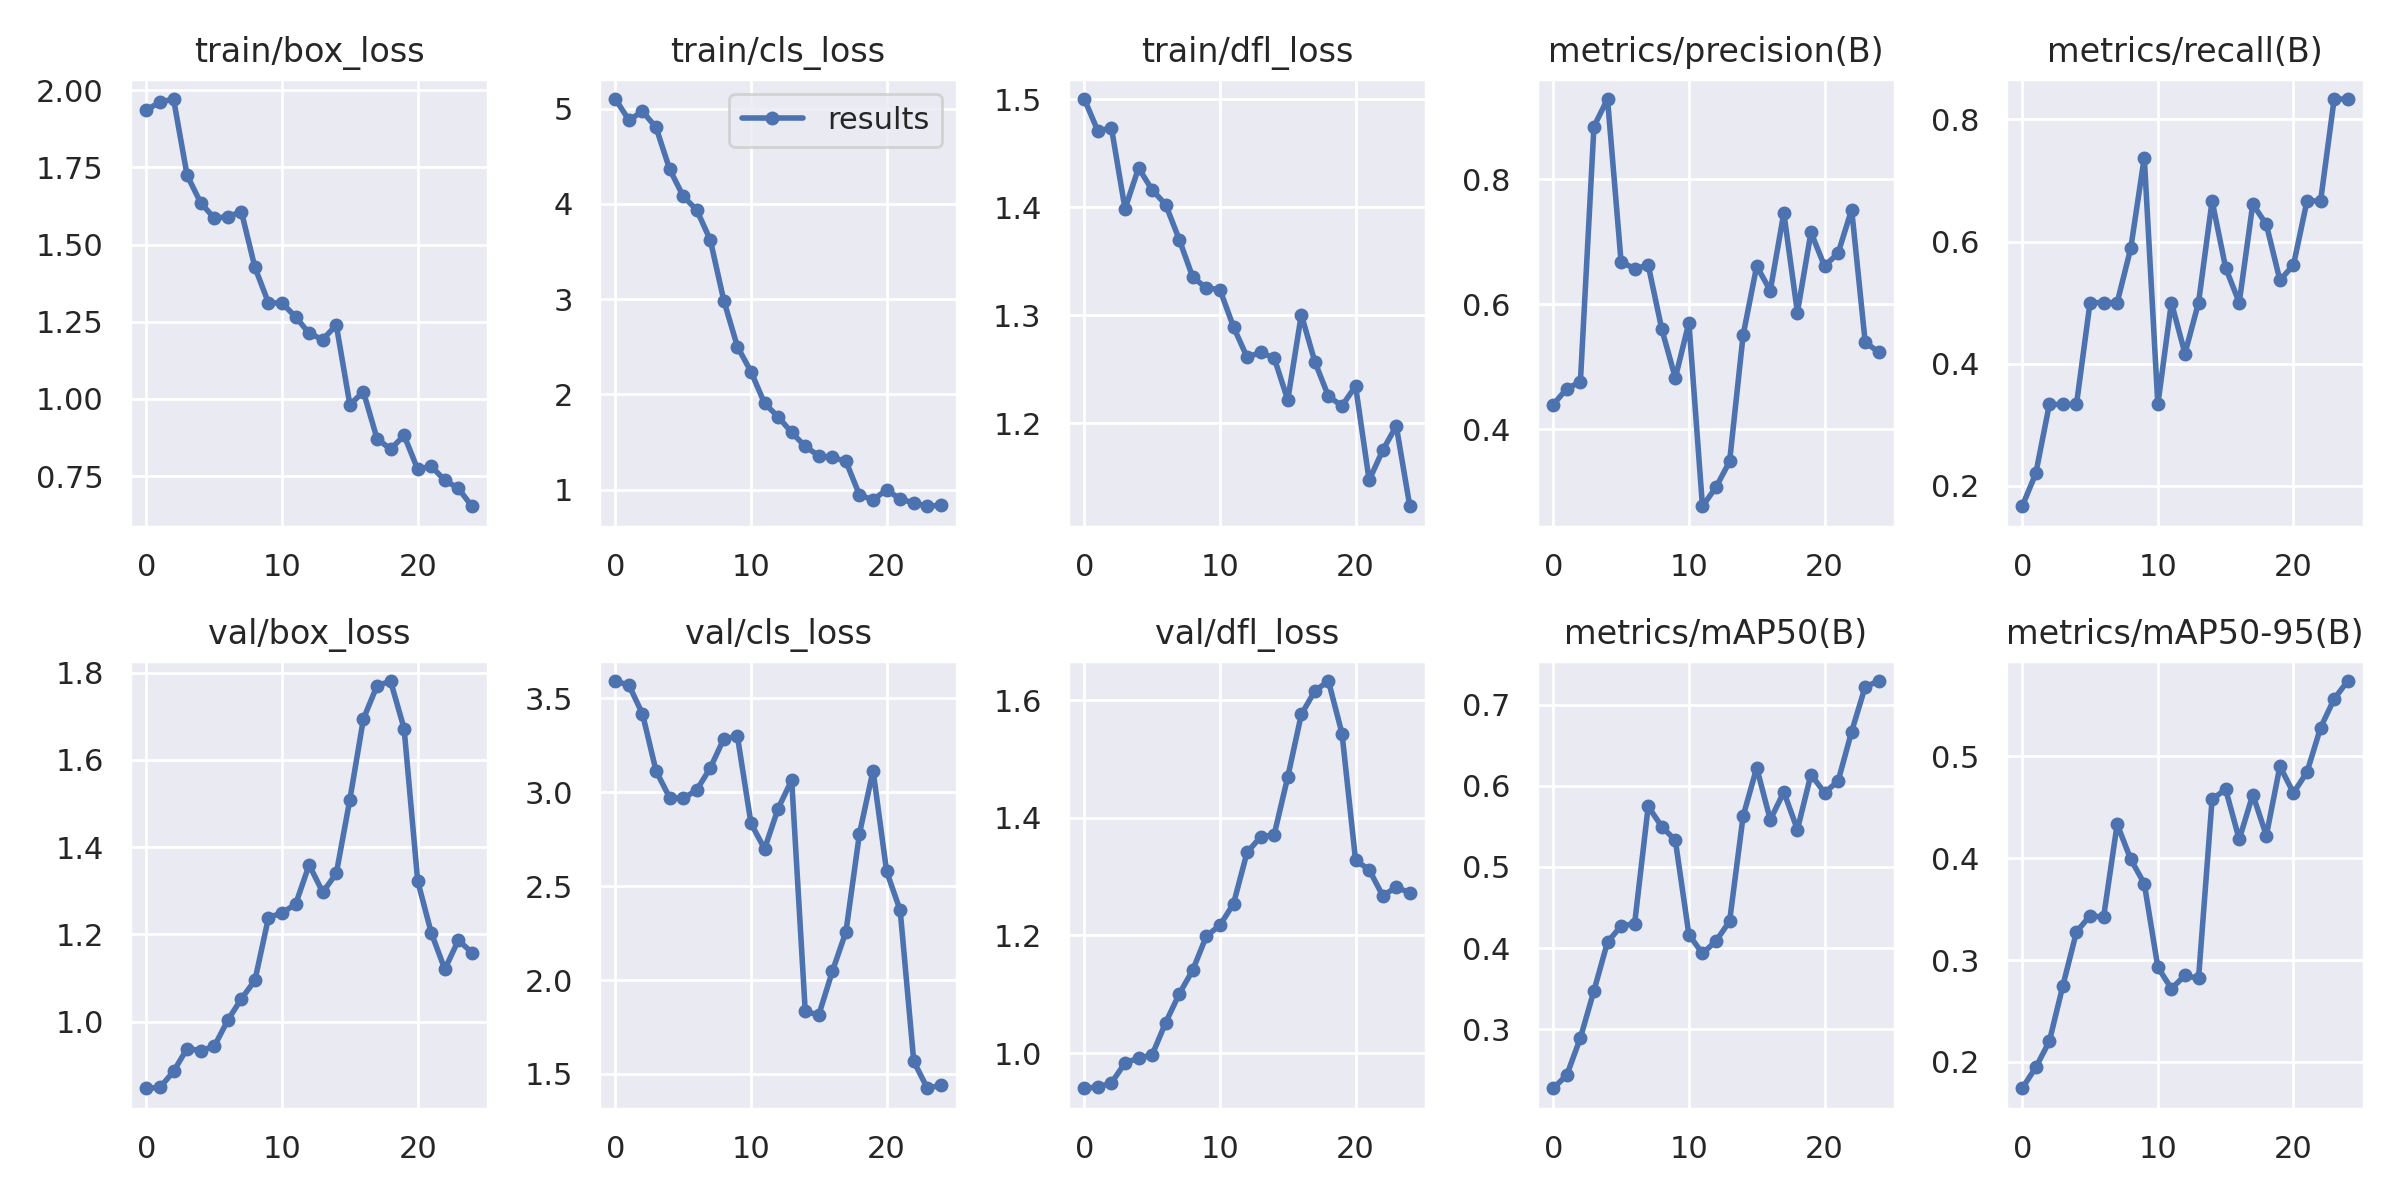

In [45]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


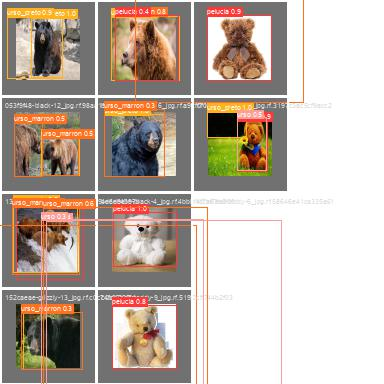

In [46]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [47]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-04-19 22:06:46.890116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/ursos-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.73it/s]
                   all         10         12      0.526      0.833      0.729      0.574
               pelucia         10          4      0.692          1      0.945      0.641
           urso_marron         10          4      0.402        0.5      0.372      0.335
            urso_preto         10          4      0.485          1       0.87      0.747
Speed: 0.1ms pre-process, 11.7ms inference, 0.0ms loss, 13.5ms post-process per image


## Inference with Custom Model

In [48]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-04-19 22:07:30.746075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/7 /content/datasets/ursos-1/test/images/047b656d-teddy-2_jpg.rf.1aa7e070322c86fba72d9a55bc36969b.jpg: 64x64 1 urso_preto, 8.3ms
image 2/7 /content/datasets/ursos-1/test/images/3315e0a2-teddy-4_jpg.rf.9e993ce9817912d0ce480253389953a3.jpg: 64x64 1 pelucia, 8.3ms
image 3/7 /content/datasets/ursos-1/test/images/476d0d98-grizzly-5_jpg.rf.d783dd9ccd6340e0fc876554822cac37.jpg: 64x64 2 urso_marrons, 1 urso_preto, 8.1ms
image 4/7 /content/datasets/ursos-1/test/images/8667bf0b-teddy-17_jpg.rf.12d2eb0f18fcb92b2ff39aed6d4b66e7.jpg: 64x64 1 pelucia, 8.1ms
image 5/7 /content/datasets/ursos-1/test/images/8dfcc94f-black-11_jpg.rf.2471daed2922381edd36569705f9eea3.jpg: 64x64 1 urso_preto, 8.1ms
image 

**NOTE:** Let's take a look at few results.

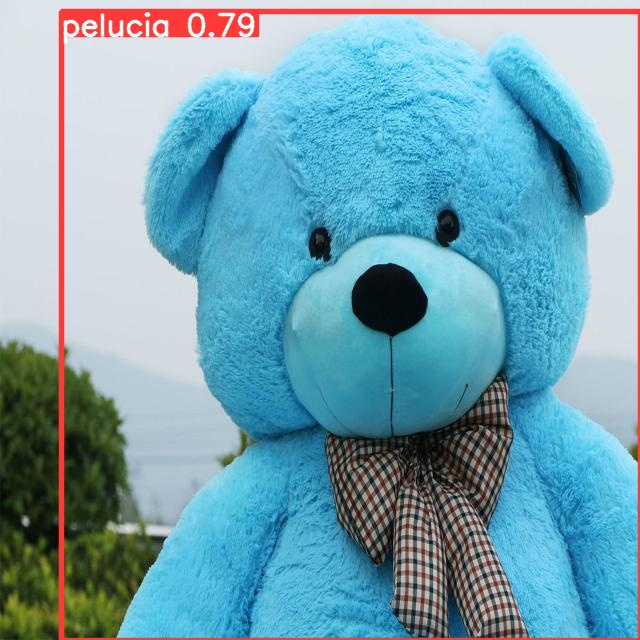

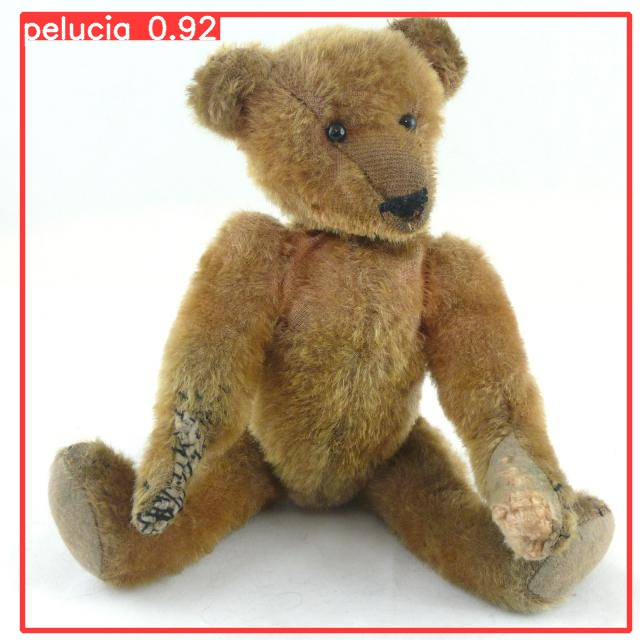

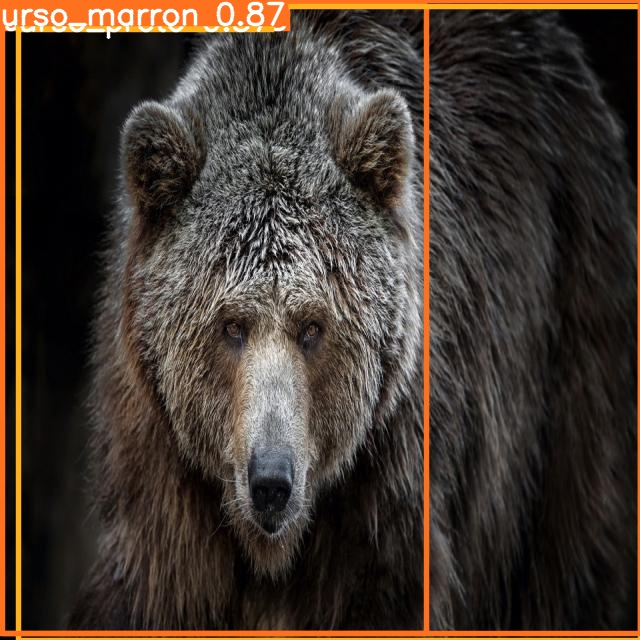

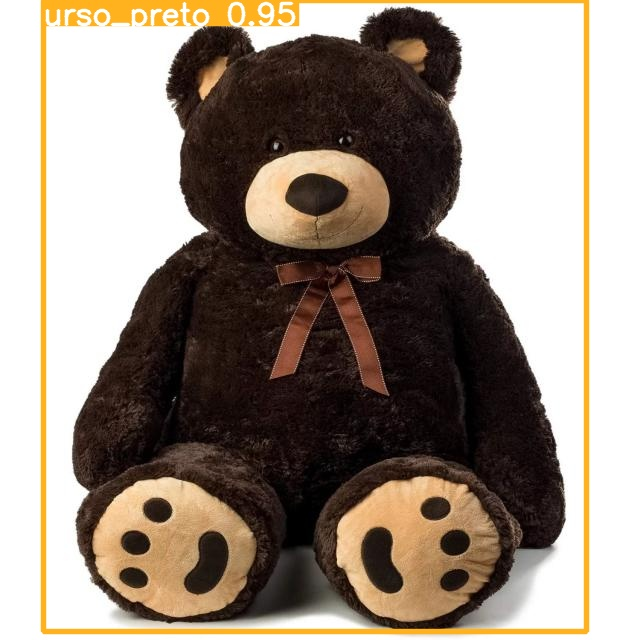

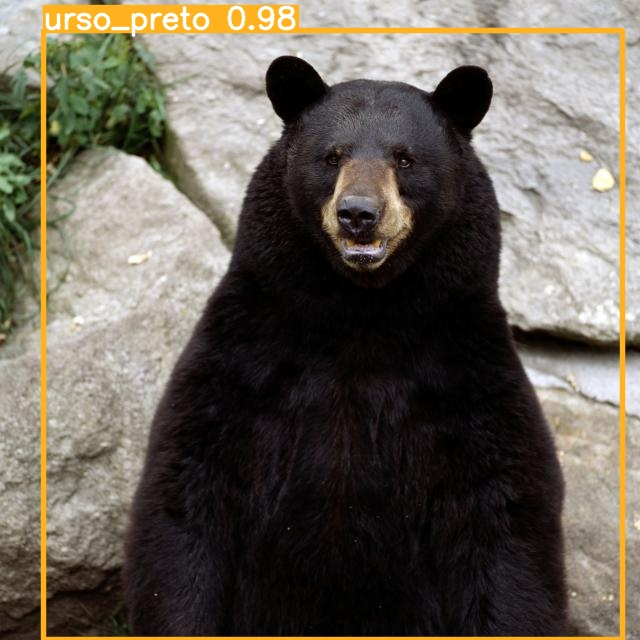

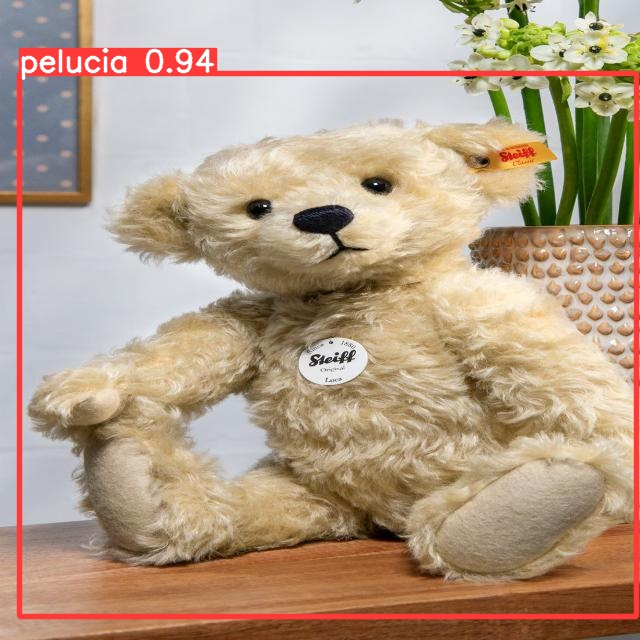

In [52]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:6]:
      display(Image(filename=image_path, width=600))
      print("\n")